## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 



## Statistical Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats


In [2]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [3]:
#this is generated at enf of 1_eda.ipynb
# it has some features added for dates and close time in days
#write to file with new features added for next notebook: visualization
df = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_zip_food_ftr_eng_1.csv', low_memory=False)
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER,food_center_count
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.054729,90063.0,High,4.0,2.0


## Mann- Whitney U.  Correlation

In [4]:
# try more correlation technique as per Prof. Silva's feedback
"""
Mann- Whitney U. 
You can check the p-value (p). A low p-value (.e.g, <0.05) means that the two groups have different distribution for that feature, indicating a potential dependence.
"""
from scipy.stats import mannwhitneyu

df_compare = df.copy() 
df_compare = df_compare[['JENI_TIER','closed_days_scaled']]
df_compare = df_compare.dropna()

# 1. Close time correlation checks

## JENI_TIER correlation

In [5]:
values_group_A = df_compare[ df_compare['JENI_TIER'] == 1 ]['closed_days_scaled']
values_group_B = df_compare[ df_compare['JENI_TIER'] == 5 ]['closed_days_scaled']

u, p = mannwhitneyu(values_group_A, values_group_B)

In [6]:
df.shape

(63104, 155)

In [7]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('13426147.5000000000', '0.0000000000')

# Food Center correlation

In [8]:

df_compare = df.copy() 
df_compare = df_compare[['food_center_count','closed_days_scaled']]
df_compare = df_compare.dropna()

In [9]:
values_group_A = df_compare[ df_compare['food_center_count'] == 1 ]['closed_days_scaled']
values_group_B = df_compare[ df_compare['food_center_count'] == 5 ]['closed_days_scaled']

u, p = mannwhitneyu(values_group_A, values_group_B)

In [10]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('6900058.5000000000', '0.0000666333')

## Park Distance correlation

In [12]:

df_compare = df.copy() 
df_compare = df_compare[['park_distance_bins','closed_days_scaled','close_time_days_x','close_time_bins','park_distance_scaled']]
df_compare = df_compare.dropna()

<Axes: title={'center': 'close_time_bins'}, xlabel='park_distance_bins'>

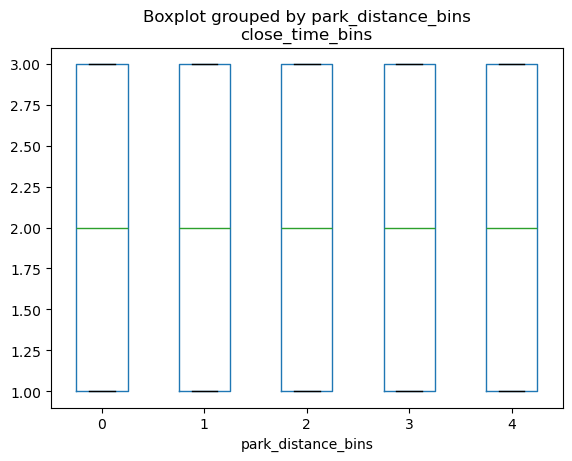

In [13]:
df[df["close_time_days_x"]<200].boxplot(by = 'park_distance_bins', column =['close_time_bins'], grid = False) 


In [15]:

values_group_A = df_compare[ df_compare['park_distance_bins'] == 0 ]['closed_days_scaled']
values_group_B = df_compare[ df_compare['park_distance_bins'] == 4 ]['closed_days_scaled']

u, p = mannwhitneyu(values_group_A, values_group_B)

In [16]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('6457184.0000000000', '0.1630814172')

# Volume correlation checks

## 1. Park Distance

In [76]:

df_compare = df.copy() 
df_compare = df_compare[['park_distance' ]]
df_compare = df_compare.dropna()

df_cnts = round(df_compare['park_distance']).value_counts()
df_cnts = pd.DataFrame(df_cnts)
df_cnts.rename(columns={'count':'ticket_count'}, inplace=True)
df_cnts.head(10 ).sort_index()

,ticket_count
park_distance,
0.0,24119
1.0,31099
2.0,6142
3.0,1518
4.0,194
5.0,9
6.0,8
8.0,2
11.0,2


In [79]:

values_group_A = df_cnts.iloc[0:2,0]  
values_group_B = df_cnts.iloc[2:,0]  
df_cnts
u, p = mannwhitneyu(values_group_A, values_group_B)

In [80]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('30.0000000000', '0.0267521591')

## 2. Food center counts

In [84]:

df_compare = df.copy() 
df_compare = df_compare[['food_center_count' ]]
df_compare = df_compare.dropna()

df_cnts = round(df_compare['food_center_count']).value_counts()
df_cnts = pd.DataFrame(df_cnts)
df_cnts.rename(columns={'count':'site_count'}, inplace=True)
df_cnts.head(10 ).sort_index()

,site_count
food_center_count,
0.0,20309
1.0,18700
2.0,16929
3.0,2358
4.0,4003
5.0,805


In [88]:

values_group_A = df_cnts.iloc[0:3,0]  
values_group_B = df_cnts.iloc[3:,0]  
df_cnts
u, p = mannwhitneyu(values_group_A, values_group_B)

In [89]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('9.0000000000', '0.1000000000')

In [92]:
values_group_B

food_center_count
4.0    4003
3.0    2358
5.0     805
Name: site_count, dtype: int64

## 3. JENI tier counts

In [93]:

df_compare = df.copy() 
df_compare = df_compare[['JENI_TIER' ]]
df_compare = df_compare.dropna()

df_cnts = round(df_compare['JENI_TIER']).value_counts()
df_cnts = pd.DataFrame(df_cnts)
df_cnts.rename(columns={'count':'tier_count'}, inplace=True)
df_cnts.head(10 ).sort_index()

,tier_count
JENI_TIER,
1.0,1241
2.0,9687
3.0,11905
4.0,15038
5.0,25205


In [94]:

values_group_A = df_cnts.iloc[0:2,0]  
values_group_B = df_cnts.iloc[3:,0]  
df_cnts
u, p = mannwhitneyu(values_group_A, values_group_B)

In [95]:
formatted_p = "{:.10f}".format(p)
formatted_u = "{:.10f}".format(u)
formatted_u, formatted_p

('4.0000000000', '0.3333333333')

In [96]:
values_group_B

JENI_TIER
2.0    9687
1.0    1241
Name: tier_count, dtype: int64